In [1]:
from validate_with_real import *
%load_ext autoreload
%autoreload 2


In [2]:
c=load_ground_truth(model_path="/Users/sarahurbut/Dropbox/resultshighamp/results/output_0_10000/model.pt")


/Users/sarahurbut/aladynoulli2/pyScripts/validate_with_real.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


In [3]:
ref_trajectories =torch.load("/Users/sarahurbut/Dropbox/data_for_running/reference_trajectories.pt")
from scipy.stats import norm
si_refs = ref_trajectories['signature_refs']

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_1696/2193323617.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ref_trajectories =torch.load("/Users/sarahurbu

In [5]:
from new_clust import *
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
N=10000
D=348
T=c['Y'].shape[2]
K=si_refs.shape[0]
P=c['G'].shape[1]
print(P)
print(K)
print(D)
print(T)
print(N)


36
20
348
52
10000


In [13]:
real_psi=c['model_state_dict']['psi'].detach().numpy()

In [ ]:
generate_clustered_survival_data_from_real()

In [48]:
from new_clust import *
sim_data = generate_clustered_survival_data_from_real(N,D,T,K,P,
                                                      G=c['G'],
                                                      real_signature_refs=si_refs,
                                                      real_logit_prev_t=c['logit_prevalence_t'],
                                                      real_gamma=c['model_state_dict']['gamma'],
                                                      real_psi=real_psi,
                                                      init_sd_scaler=1e-2,
                                                      signature_scale=0,
                                                      use_fixed_psi=True)

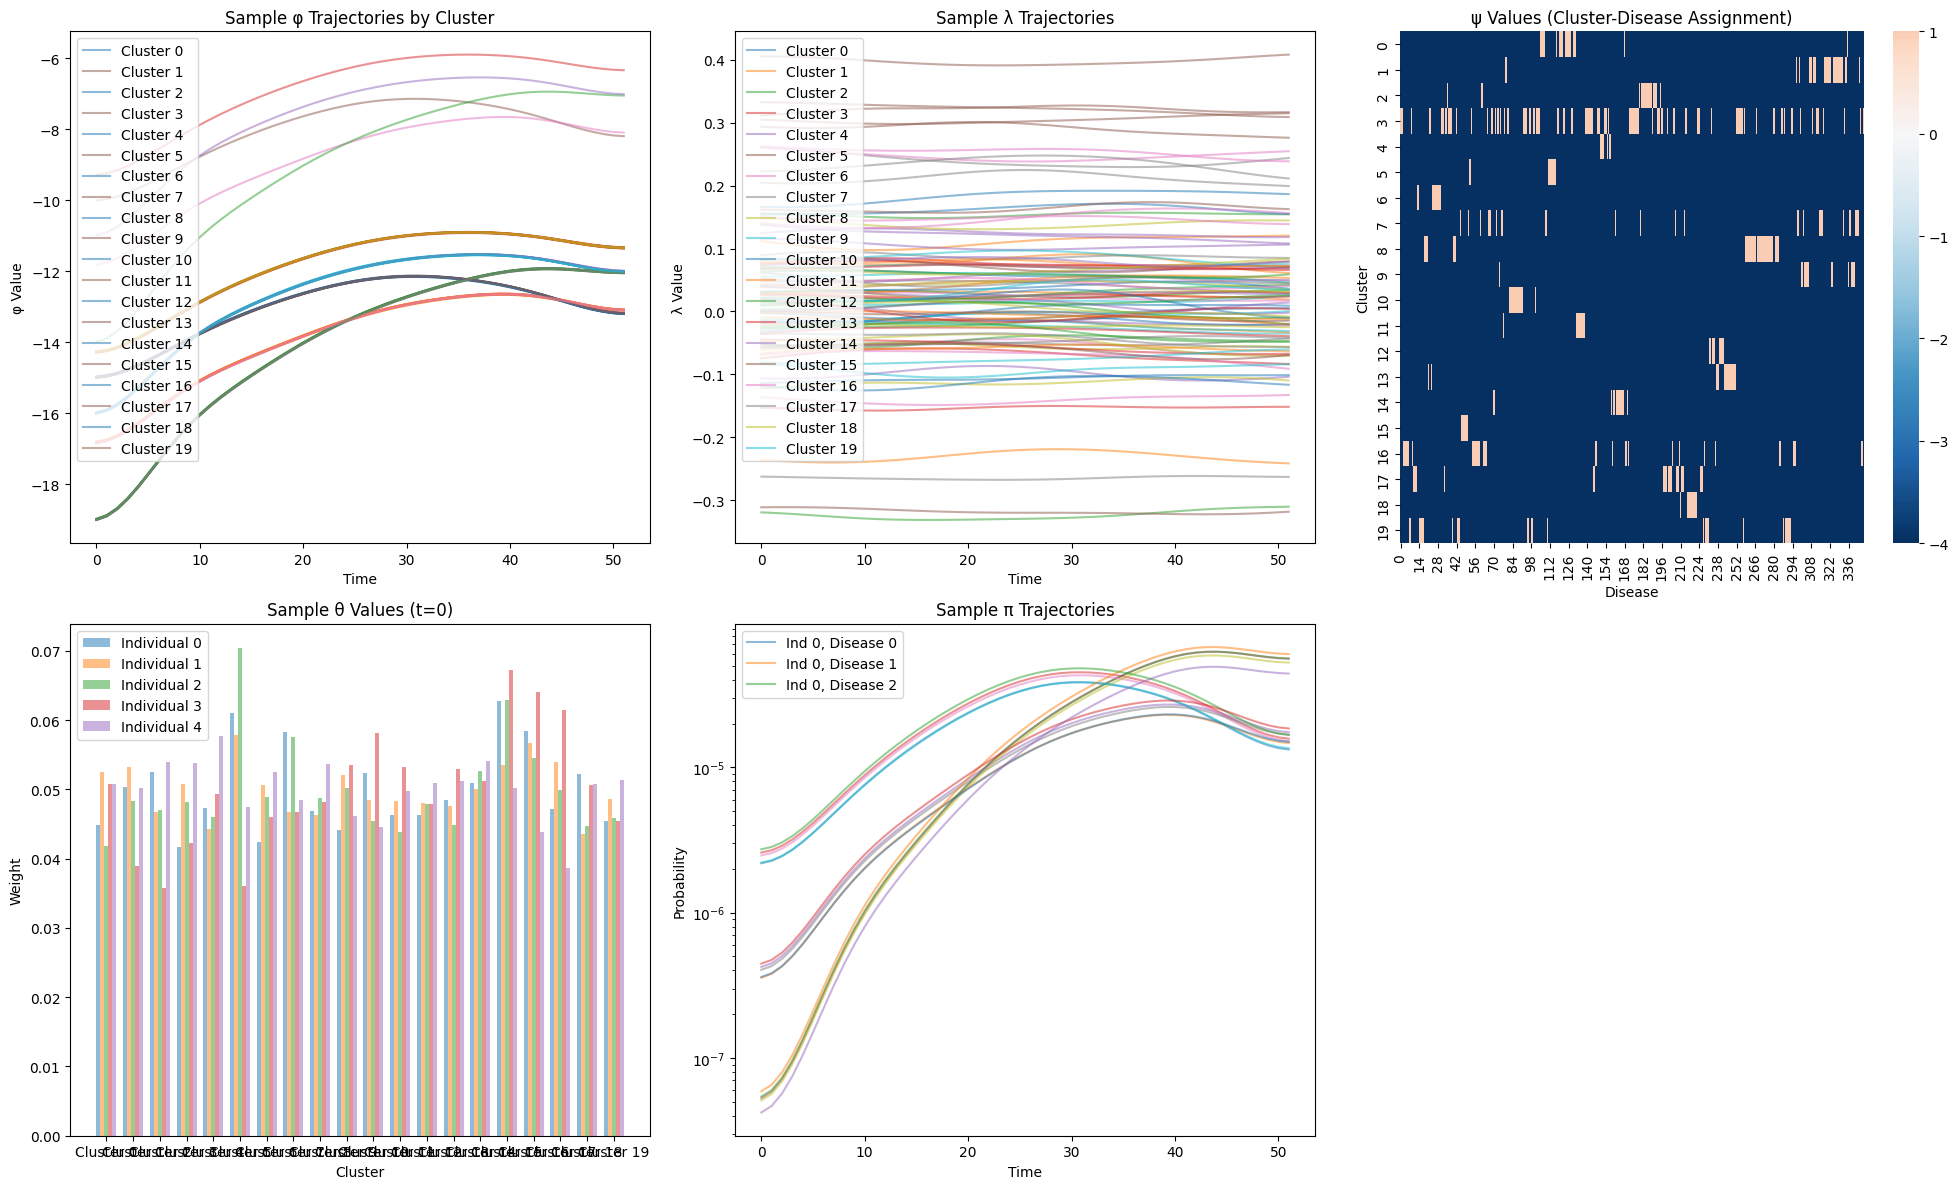

/Users/sarahurbut/aladynoulli2/pyScripts/plotting.py:59: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


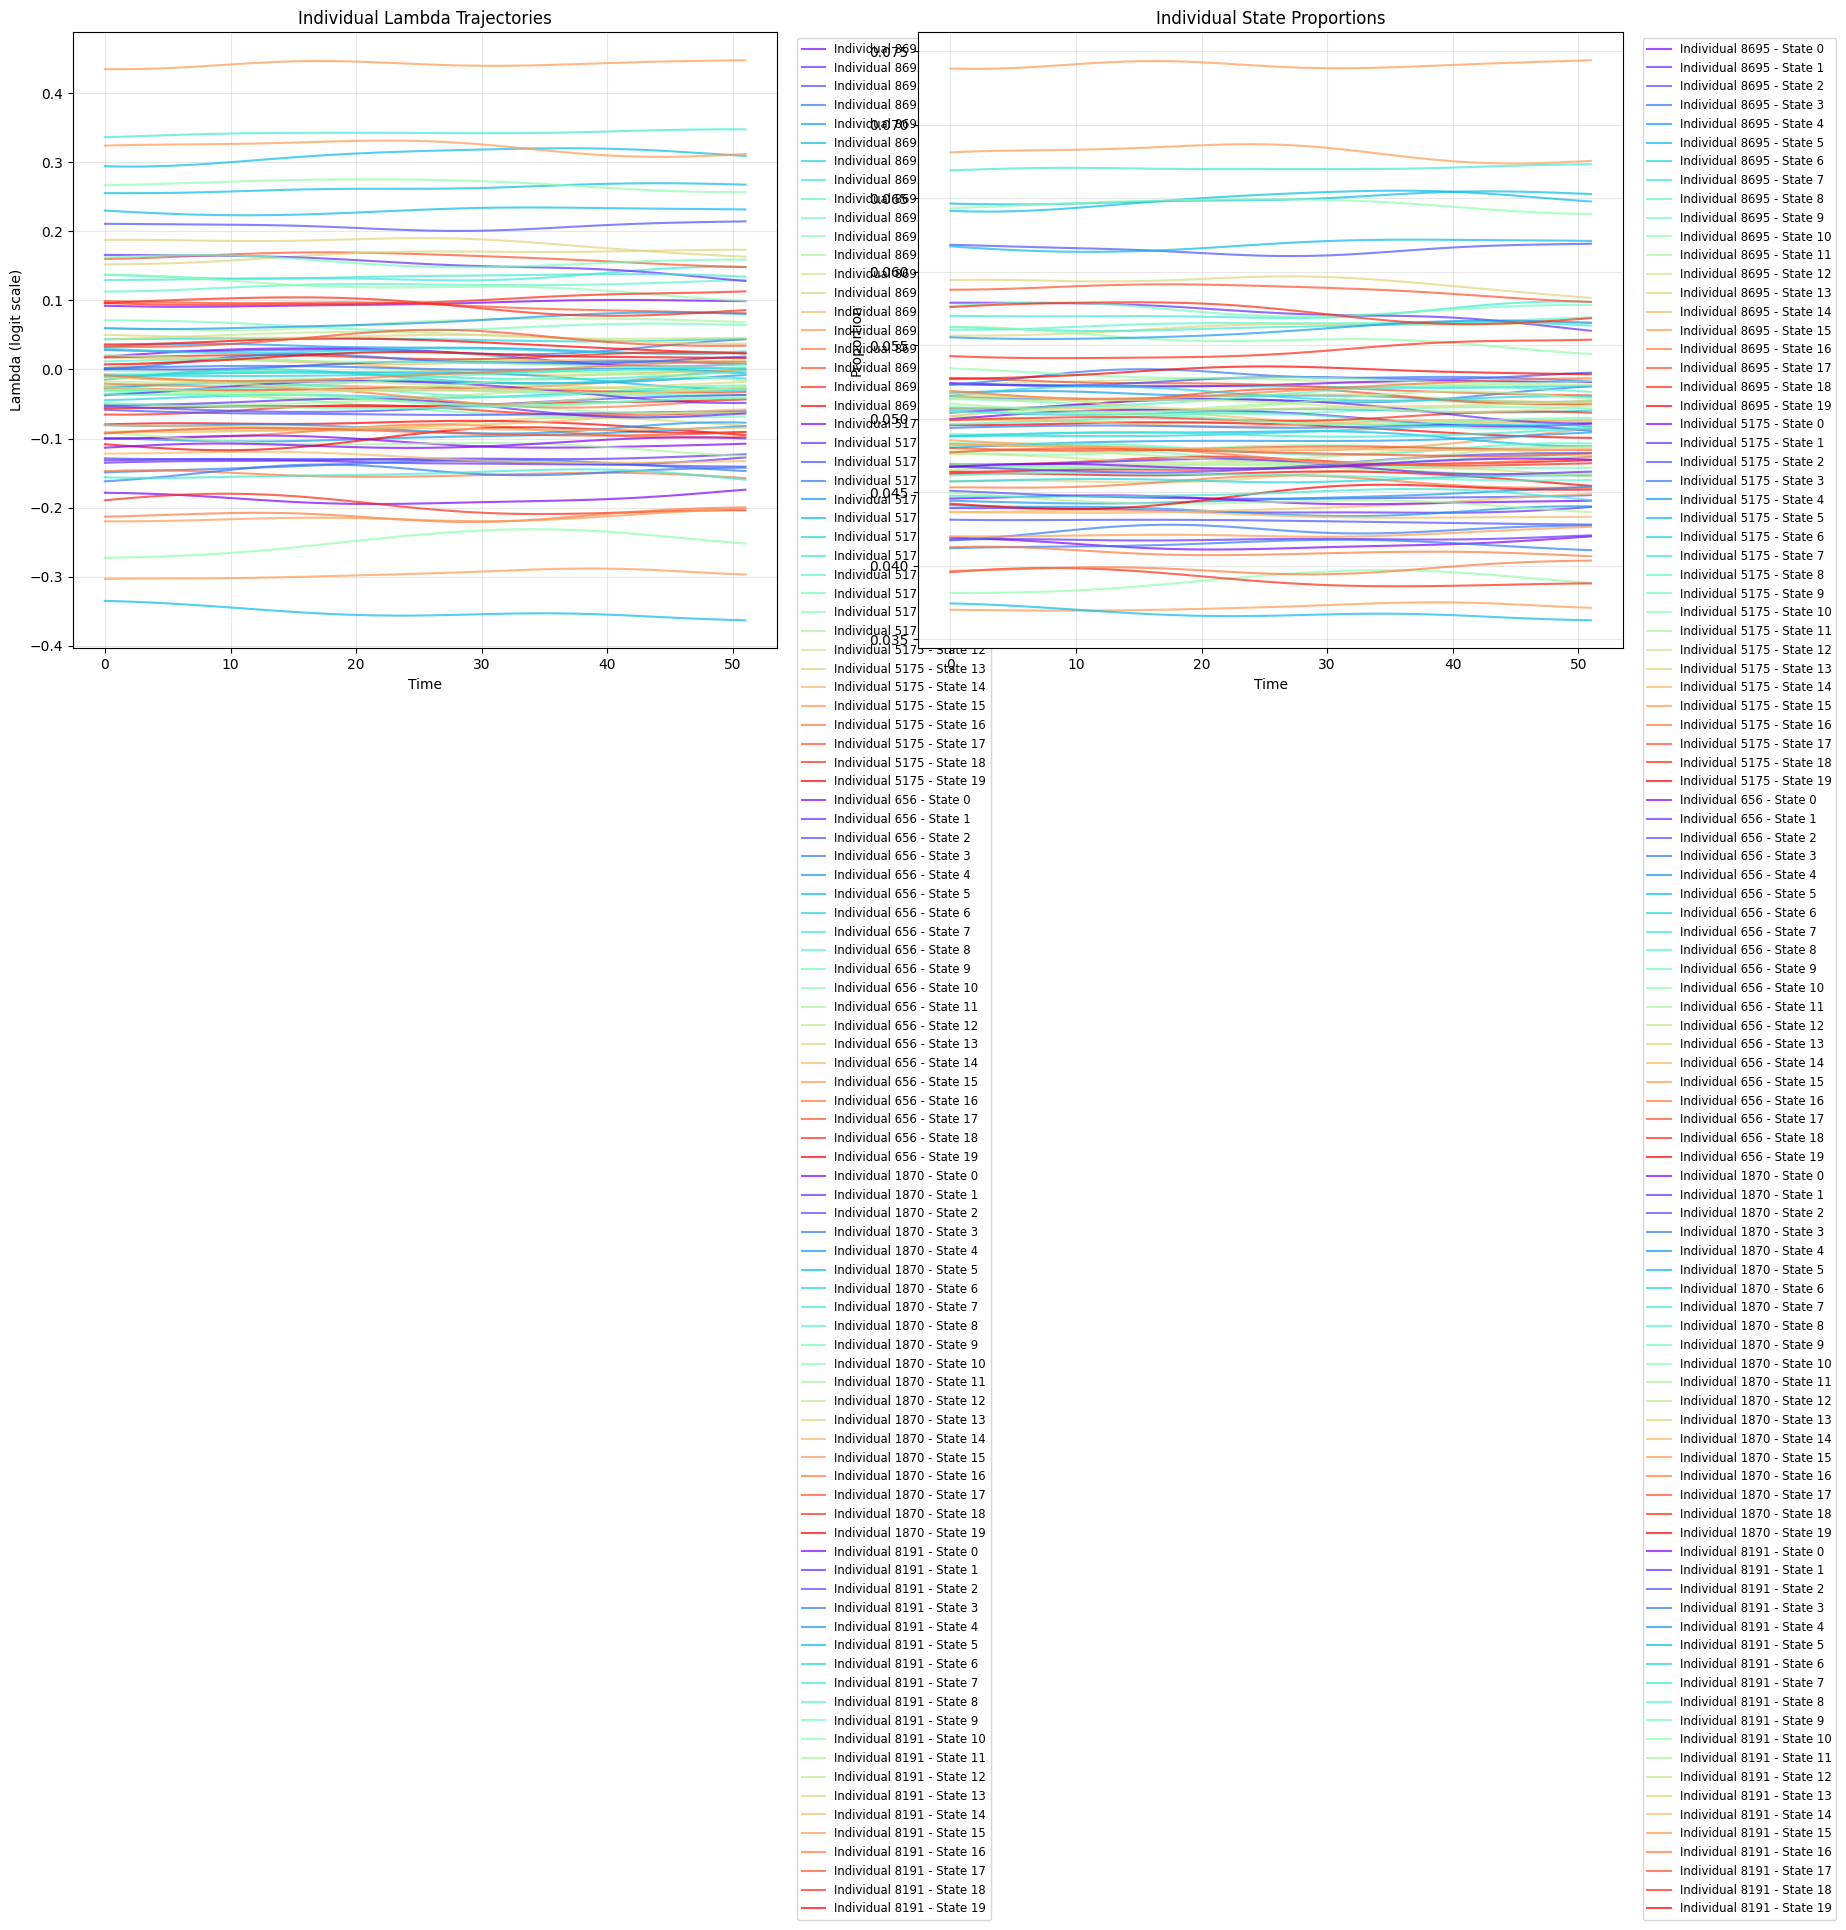

In [49]:
from plotting import *
plot_synthetic_components(sim_data)
plot_individual_trajectories(sim_data, n_individuals=5)



In [50]:
# Import the class from clust_huge_amp
from clust_huge_amp import AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest


# 3. Reinitialize model with the estimated references
# First compute smoothed prevalence
smoothed_prev = compute_smoothed_prevalence(sim_data['Y'], window_size=5)


In [51]:
print(P)
print(K)
print(D)
print(T)
print(N)


36
20
348
52
10000


In [52]:

initial_model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=N, D=D, T=T, K=K, P=P,
    G=sim_data['G'], 
    Y=torch.tensor(sim_data['Y'], 
                   dtype=torch.float32),
    R=0.0,  # No LRT penalty
    W=0.01,  # Low GP weight to be responsive
    prevalence_t=smoothed_prev,
    init_sd_scaler=1e-2,  # Smaller to stay closer to mean
    genetic_scale=1.0,
    flat_lambda=True,
    healthy_reference=None
)


/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G_scaled, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/u


Cluster Sizes:
Cluster 0: 17 diseases
Cluster 1: 8 diseases
Cluster 2: 16 diseases
Cluster 3: 11 diseases
Cluster 4: 35 diseases
Cluster 5: 40 diseases
Cluster 6: 15 diseases
Cluster 7: 16 diseases
Cluster 8: 6 diseases
Cluster 9: 39 diseases
Cluster 10: 7 diseases
Cluster 11: 22 diseases
Cluster 12: 6 diseases
Cluster 13: 16 diseases
Cluster 14: 9 diseases
Cluster 15: 43 diseases
Cluster 16: 10 diseases
Cluster 17: 5 diseases
Cluster 18: 7 diseases
Cluster 19: 20 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 17
Base value (first 5): tensor([-18.4207, -18.4207, -18.4207, -18.4207, -18.4207])
Base value centered (first 5): tensor([-0.0858, -0.0858, -0.0858, -0.0858, -0.0858])
Base value centered mean: 2.091407850457472e-06
Gamma init for k=0 (first 5): tensor([-0.0047, -0.0011, -0.0009, -0.0009, -0.0071])

Calculating gamma for k=1:
Number of diseases in cluster: 8
Base value (first 5): tensor([-18.4207, -18.4207, -18.4207, -18.4207, -18.4207])
Base value centered

In [61]:

# Get initial clusters
initial_clusters = initial_model.clusters

# Create confusion matrix between initial clusters and true clusters
from sklearn.metrics import confusion_matrix
import seaborn as sns




In [54]:
initial_model.D

348

In [55]:
c['model_state_dict']['psi'].shape

torch.Size([21, 348])

In [56]:
sim_data['clusters']

array([ 3,  3, 16, 16, 16, 16, 16, 19,  3, 16, 17, 17, 17,  6, 19, 19, 19,
       19,  8,  8,  8, 13,  3, 13,  6,  6,  6,  6,  6,  6,  6,  3,  3, 17,
        3,  2,  3,  3,  3, 19,  8,  8,  3, 19, 19,  7, 15, 15, 15, 15, 15,
        7,  5,  3, 16, 16, 16, 16, 16, 16,  7,  2, 16, 16, 16,  3,  7,  7,
        3,  3, 14,  3,  7,  3,  9,  3,  7, 11,  3,  1,  3,  3, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10,  3,  3,  3, 19, 19,  3, 19, 19,  3, 10,
        3,  3,  3,  0,  0,  0,  0,  7, 19,  5,  5,  5,  5,  5,  5,  0,  3,
        0,  0,  0,  3,  3,  0,  0,  0,  0,  3,  3,  0,  0, 11, 11, 11, 11,
       11, 11, 11,  3,  3,  3,  3,  3,  3, 17, 16, 16,  3,  3,  4,  4,  4,
        3,  3,  4,  3,  4, 14, 16, 14,  7, 14, 14, 14, 14, 14, 14,  0, 16,
       14, 16,  3,  3,  3,  3,  3,  3,  3,  2,  7,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  2,  2,  2,  3,  3,  2,  3, 17, 17, 17,  3, 17, 17, 17,
       16,  3,  7, 17, 17, 16, 18, 17, 17,  7,  3, 18, 18, 18, 18, 18, 18,
       18, 18,  3,  3, 17

In [69]:
from new_clust import *
plot_aligned_confusion_matrix(sim_data['clusters'], initial_clusters, 20)

NameError: name 'plot_aligned_confusion_matrix' is not defined

In [58]:
from plotting import *
analyze_disease_clusters(sim_data['clusters'],c['disease_names'])

Disease Cluster Analysis:
------------------------

Cluster 0 (Size: 16):
  - [np.str_('Aortic valve disease')]
  - [np.str_('Atrial fibrillation and flutter')]
  - [np.str_('Cardiomegaly')]
  - [np.str_('Congenital anomalies of great vessels')]
  - [np.str_('Congestive heart failure (CHF) NOS')]
  - [np.str_('Disease of tricuspid valve')]
  - [np.str_('Heart failure NOS')]
  - [np.str_('Left bundle branch block')]
  - [np.str_('Mitral valve disease')]
  - [np.str_('Other forms of chronic heart disease')]
  - [np.str_('Paroxysmal supraventricular tachycardia')]
  - [np.str_('Paroxysmal ventricular tachycardia')]
  - [np.str_('Pericarditis')]
  - [np.str_('Pleurisy; pleural effusion')]
  - [np.str_('Primary/intrinsic cardiomyopathies')]
  - [np.str_('Rheumatic disease of the heart valves')]

Cluster 1 (Size: 21):
  - [np.str_('Acquired toe deformities')]
  - [np.str_('Arthropathy NOS')]
  - [np.str_('Enthesopathy')]
  - [np.str_('Hallux rigidus')]
  - [np.str_('Hallux valgus (Bunion)')]

In [73]:
sim_data['psi'][:,0]

array([-4., -4., -4.,  1., -4., -4., -4., -4., -4., -4., -4., -4., -4.,
       -4., -4., -4., -4., -4., -4., -4.])

In [65]:
from plotting import *
analyze_disease_clusters(initial_clusters,c['disease_names'])


Disease Cluster Analysis:
------------------------

Cluster 0 (Size: 17):
  - [np.str_('Acute appendicitis')]
  - [np.str_('Arthropathy NOS')]
  - [np.str_('Carbuncle and furuncle')]
  - [np.str_('Cervicitis and endocervicitis')]
  - [np.str_('Coronary atherosclerosis')]
  - [np.str_('Diverticulosis')]
  - [np.str_('Esophageal bleeding (varices/hemorrhage)')]
  - [np.str_('Hypopotassemia')]
  - [np.str_('Inflammatory and toxic neuropathy')]
  - [np.str_('Ingrowing nail')]
  - [np.str_('Malignant neoplasm of ovary')]
  - [np.str_('Osteoarthrosis, localized, primary')]
  - [np.str_('Other diseases of respiratory system, NEC')]
  - [np.str_('Other disorders of bladder')]
  - [np.str_('Pain in limb')]
  - [np.str_('Peripheral vascular disease, unspecified')]
  - [np.str_('Unstable angina (intermediate coronary syndrome)')]

Cluster 1 (Size: 8):
  - [np.str_('Abdominal aortic aneurysm')]
  - [np.str_('Enthesopathy')]
  - [np.str_('Other inflammatory spondylopathies')]
  - [np.str_('Other lo

In [66]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, v_measure_score

def evaluate_clustering(true_clusters, pred_clusters):
    ari = adjusted_rand_score(true_clusters, pred_clusters)
    nmi = normalized_mutual_info_score(true_clusters, pred_clusters)
    v_score = v_measure_score(true_clusters, pred_clusters)
    
    print(f"Adjusted Rand Index: {ari:.3f}")
    print(f"Normalized Mutual Information: {nmi:.3f}")
    print(f"V-measure: {v_score:.3f}")

In [125]:
import numpy as np
from scipy.special import softmax, expit
from new_clust import *

# Use dimensions similar to real data
N = 1000  # number of individuals
D = 348   # number of diseases
T = 50    # time points
K = 20    # number of states
P = 10    # genetic components

print("Generating state-driven synthetic data...")
print(f"N={N}, D={D}, T={T}, K={K}, P={P}")

# Generate data
sim_data = generate_state_driven_data_strong_clusters(N, D, T, K, P)

Generating state-driven synthetic data...
N=1000, D=348, T=50, K=20, P=10


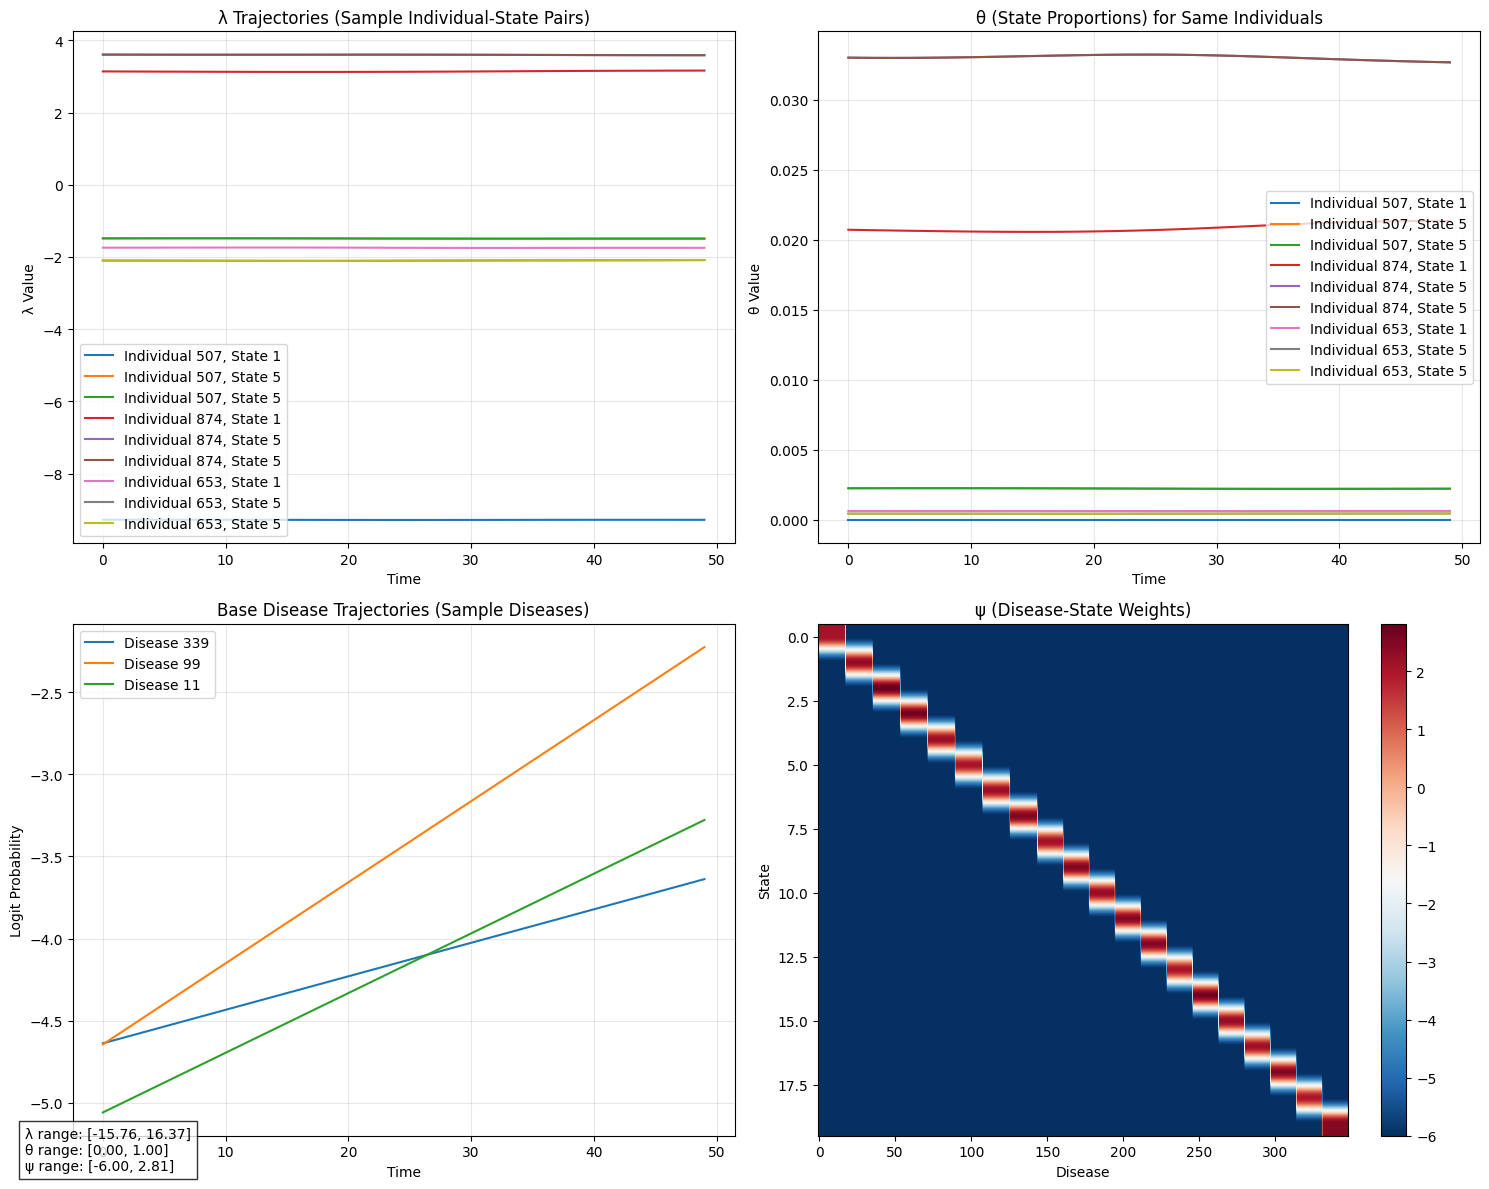

In [167]:
import numpy as np
from scipy.special import softmax, expit
from new_clust import *
# Plot components
fig = plot_sim_components(sim_data, n_samples=3)

In [168]:
# Import the class from clust_huge_amp
from clust_huge_amp import AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest


# 3. Reinitialize model with the estimated references
# First compute smoothed prevalence
smoothed_prev = compute_smoothed_prevalence(sim_data['Y'], window_size=5)


initial_model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=N, D=D, T=T, K=K, P=P,
    G=sim_data['G'], 
    Y=torch.tensor(sim_data['Y'], 
                   dtype=torch.float32),
    R=0.0,  # No LRT penalty
    W=0.01,  # Low GP weight to be responsive
    prevalence_t=smoothed_prev,
    init_sd_scaler=1e-2,  # Smaller to stay closer to mean
    genetic_scale=1.0,
    flat_lambda=True,
    healthy_reference=None
)

/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b



Cluster Sizes:
Cluster 0: 18 diseases
Cluster 1: 17 diseases
Cluster 2: 18 diseases
Cluster 3: 17 diseases
Cluster 4: 17 diseases
Cluster 5: 18 diseases
Cluster 6: 18 diseases
Cluster 7: 18 diseases
Cluster 8: 43 diseases
Cluster 9: 17 diseases
Cluster 10: 6 diseases
Cluster 11: 17 diseases
Cluster 12: 17 diseases
Cluster 13: 18 diseases
Cluster 14: 17 diseases
Cluster 15: 15 diseases
Cluster 16: 16 diseases
Cluster 17: 17 diseases
Cluster 18: 17 diseases
Cluster 19: 7 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 18
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.8155, -13.8155])
Base value centered (first 5): tensor([-0.2856, -0.2856, -0.2856, -0.2856, -0.2856])
Base value centered mean: -9.708404604680254e-07
Gamma init for k=0 (first 5): tensor([-0.2584, -0.1573, -0.0184,  0.2765, -0.1194])

Calculating gamma for k=1:
Number of diseases in cluster: 17
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.8155, -12.6480])
Base value c

In [169]:
initial_clusters = initial_model.clusters

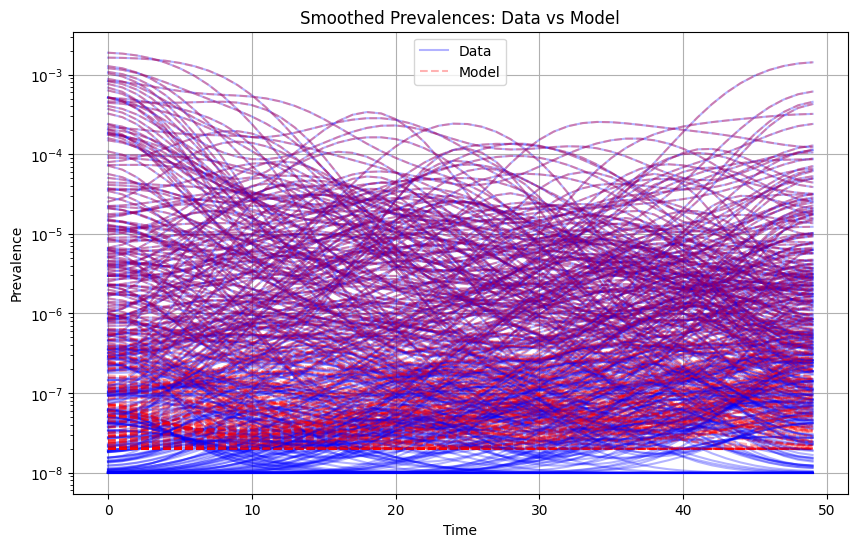

In [247]:
# For plotting smoothed prevalences
def plot_smoothed_prevalences(model, data):
    # Data smoothed prevalence
    data_prev = compute_smoothed_prevalence(data['Y'])  # Average across individuals
    
    # Model smoothed prevalence (using mu_d/logit_prev_t)
    model_prev = torch.sigmoid(model.logit_prev_t)  # Convert logits to probabilities
    
    plt.figure(figsize=(10, 6))
    
    # Plot for each disease
    for d in range(data_prev.shape[0]):
        plt.plot(data_prev[d], 'b-', alpha=0.3, label='Data' if d==0 else '')
        plt.plot(model_prev[d, :].detach().numpy(), 'r--', alpha=0.3, 
                label='Model' if d==0 else '')
    
    plt.xlabel('Time')
    plt.ylabel('Prevalence')
    plt.title('Smoothed Prevalences: Data vs Model')
    plt.legend()
    plt.yscale('log')  # Optional: use log scale if prevalences vary widely
    plt.grid(True)
    plt.show()

plot_smoothed_prevalences(initial_model, sim_data)

In [170]:
evaluate_clustering(sim_data['clusters'], initial_clusters)

Adjusted Rand Index: 0.843
Normalized Mutual Information: 0.943
V-measure: 0.943



Clustering Metrics:
Adjusted Rand Index: 0.843
Normalized Mutual Information: 0.943


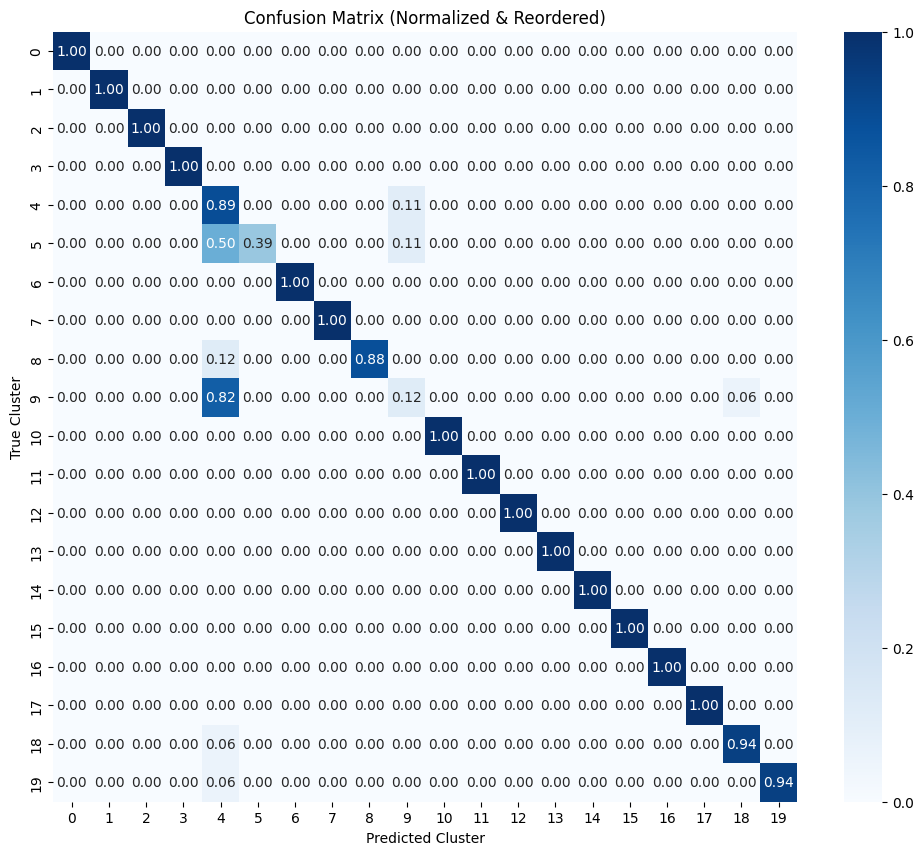

array([ 6, 13,  2,  5,  8, 19,  7,  0, 15, 10,  1,  4, 17, 18, 14,  9, 12,
       11,  3, 16])

In [171]:
from analyze_clusters import *
plot_confusion_matrix(sim_data['clusters'], initial_clusters, K=20) 

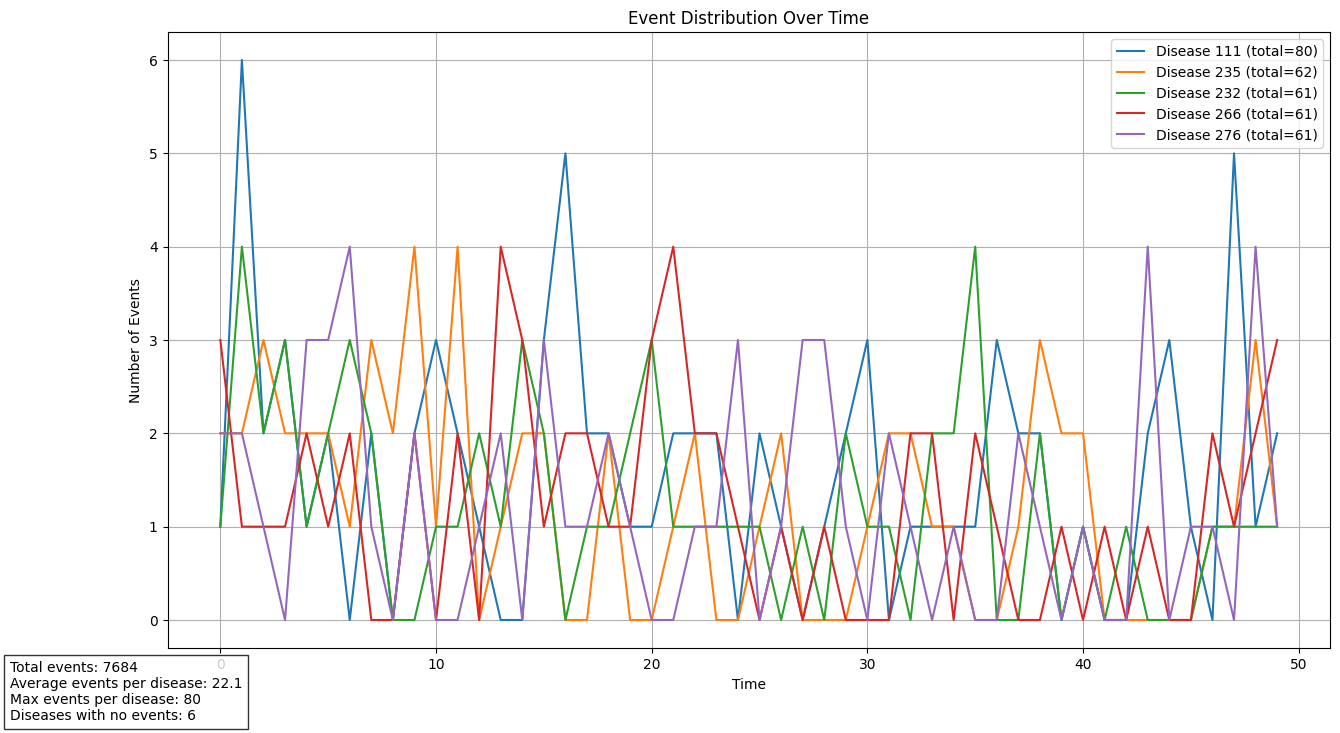

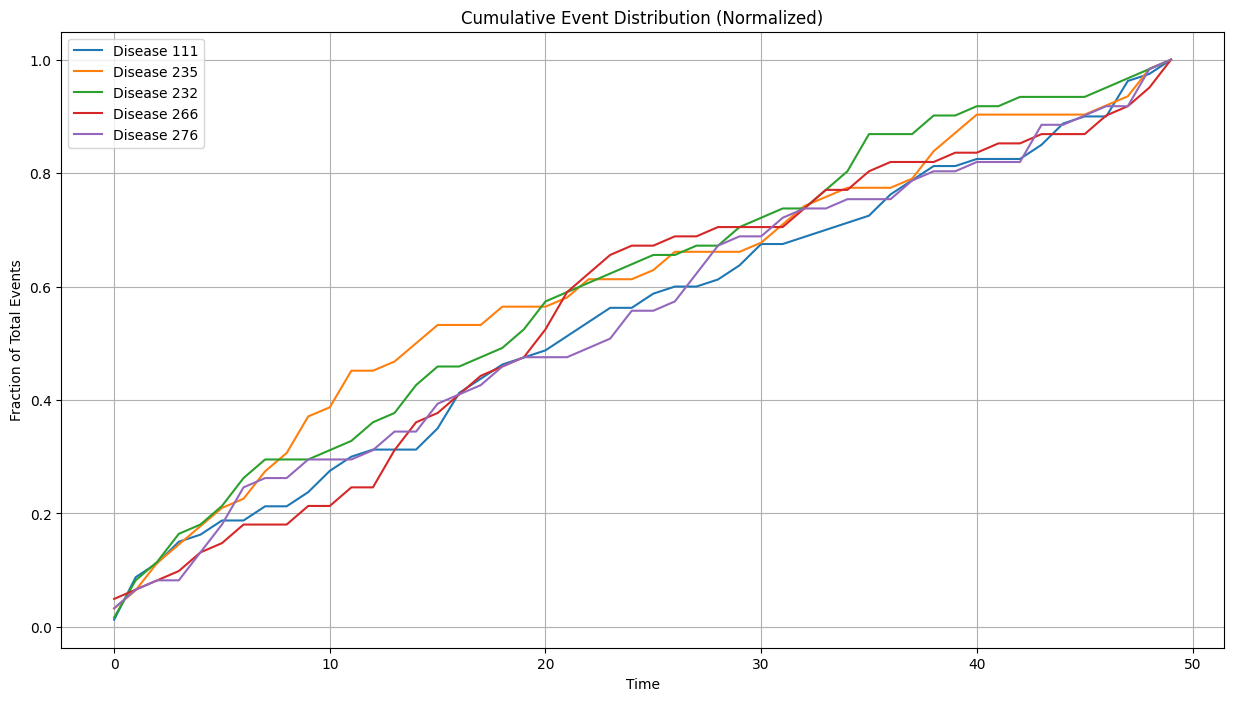

In [248]:
from new_clust import *
Y_tensor = torch.tensor(sim_data['Y'], dtype=torch.float32)

# 2. Create reference trajectories
signature_refs, healthy_ref = create_reference_trajectories(
    Y=sim_data['Y'], 
    initial_clusters=initial_model.clusters,  # Use clusters from first initialization
    K=K, 
    healthy_prop=0.01, 
    frac=0.3
)

plot_event_distribution(sim_data['Y'])

In [260]:
sim_data['Y'][0,:,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

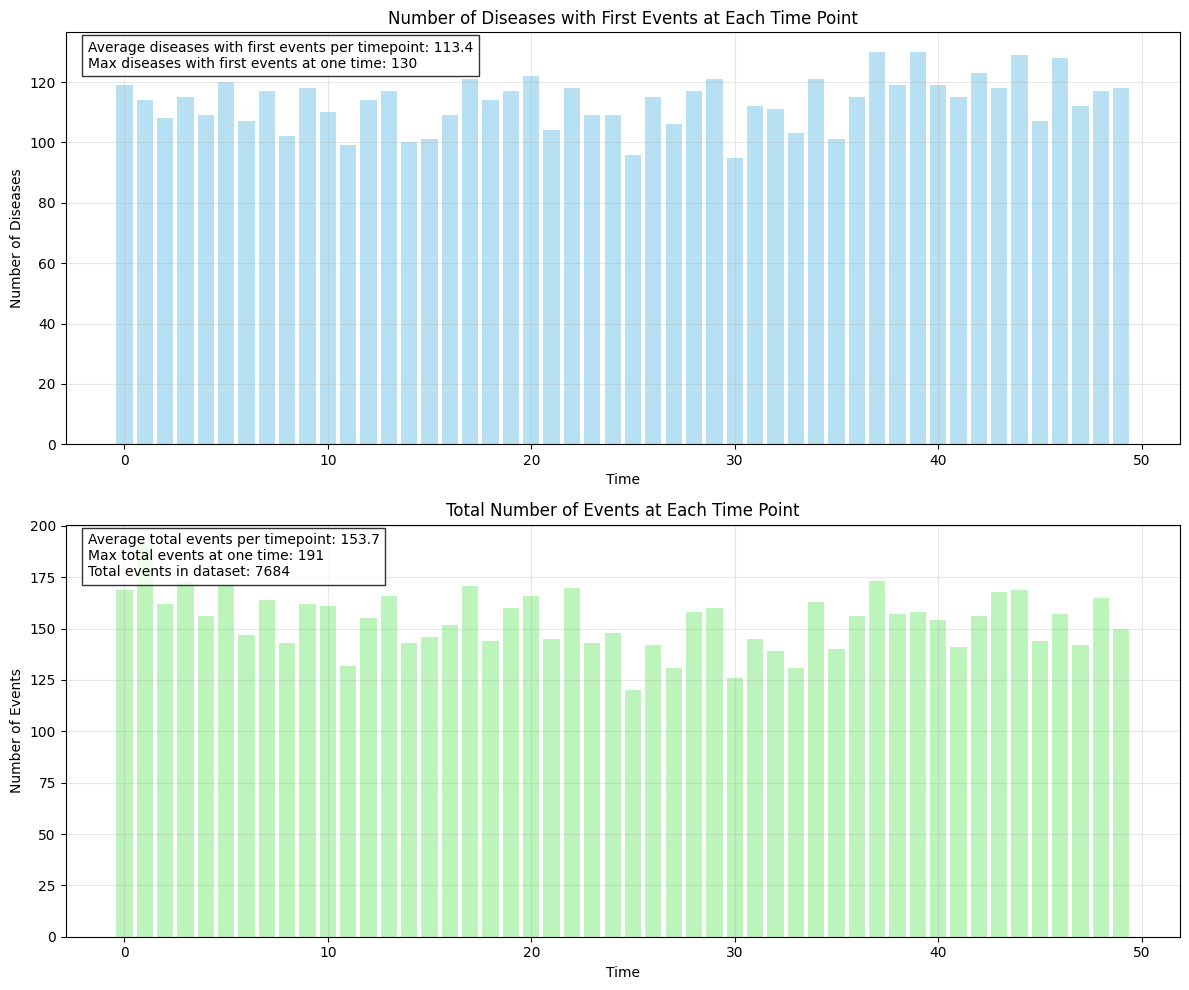

In [261]:
from new_clust import *
plot_events_comparison(sim_data['Y'])

In [229]:
from clust_huge_amp import *
# Now initialize new model with references
model_with_refs = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=sim_data['G'].shape[0], 
    D=sim_data['Y'].shape[1], 
    T=sim_data['Y'].shape[2], 
    K=K, 
    P=sim_data['G'].shape[1], 
    G=sim_data['G'], 
    Y=sim_data['Y'],
    prevalence_t=smoothed_prev,  # Use smoothed prevalence
    R=0,  # As per your previous settings
    W=0.01,  # Low weight as discussed
    init_sd_scaler=1e-2,  # As per your previous settings
    genetic_scale=1.0,
    signature_references=signature_refs,  # Convert back to numpy for initialization
    disease_names=disease_names if 'disease_names' in locals() else None,
    learn_kappa=False
)

/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.healthy_ref = torch.tensor(-5.0, dtype=torch.float32)
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b



Cluster Sizes:
Cluster 0: 18 diseases
Cluster 1: 17 diseases
Cluster 2: 18 diseases
Cluster 3: 17 diseases
Cluster 4: 17 diseases
Cluster 5: 18 diseases
Cluster 6: 18 diseases
Cluster 7: 18 diseases
Cluster 8: 43 diseases
Cluster 9: 17 diseases
Cluster 10: 6 diseases
Cluster 11: 17 diseases
Cluster 12: 17 diseases
Cluster 13: 18 diseases
Cluster 14: 17 diseases
Cluster 15: 15 diseases
Cluster 16: 16 diseases
Cluster 17: 17 diseases
Cluster 18: 17 diseases
Cluster 19: 7 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 18
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.8155, -13.8155])
Base value centered (first 5): tensor([-0.2856, -0.2856, -0.2856, -0.2856, -0.2856])
Base value centered mean: -9.708404604680254e-07
Gamma init for k=0 (first 5): tensor([-0.2584, -0.1573, -0.0184,  0.2765, -0.1194])

Calculating gamma for k=1:
Number of diseases in cluster: 17
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.8155, -12.6480])
Base value c

/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:552: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  print(self.K_lambda[0][:5, :5].detach().numpy())


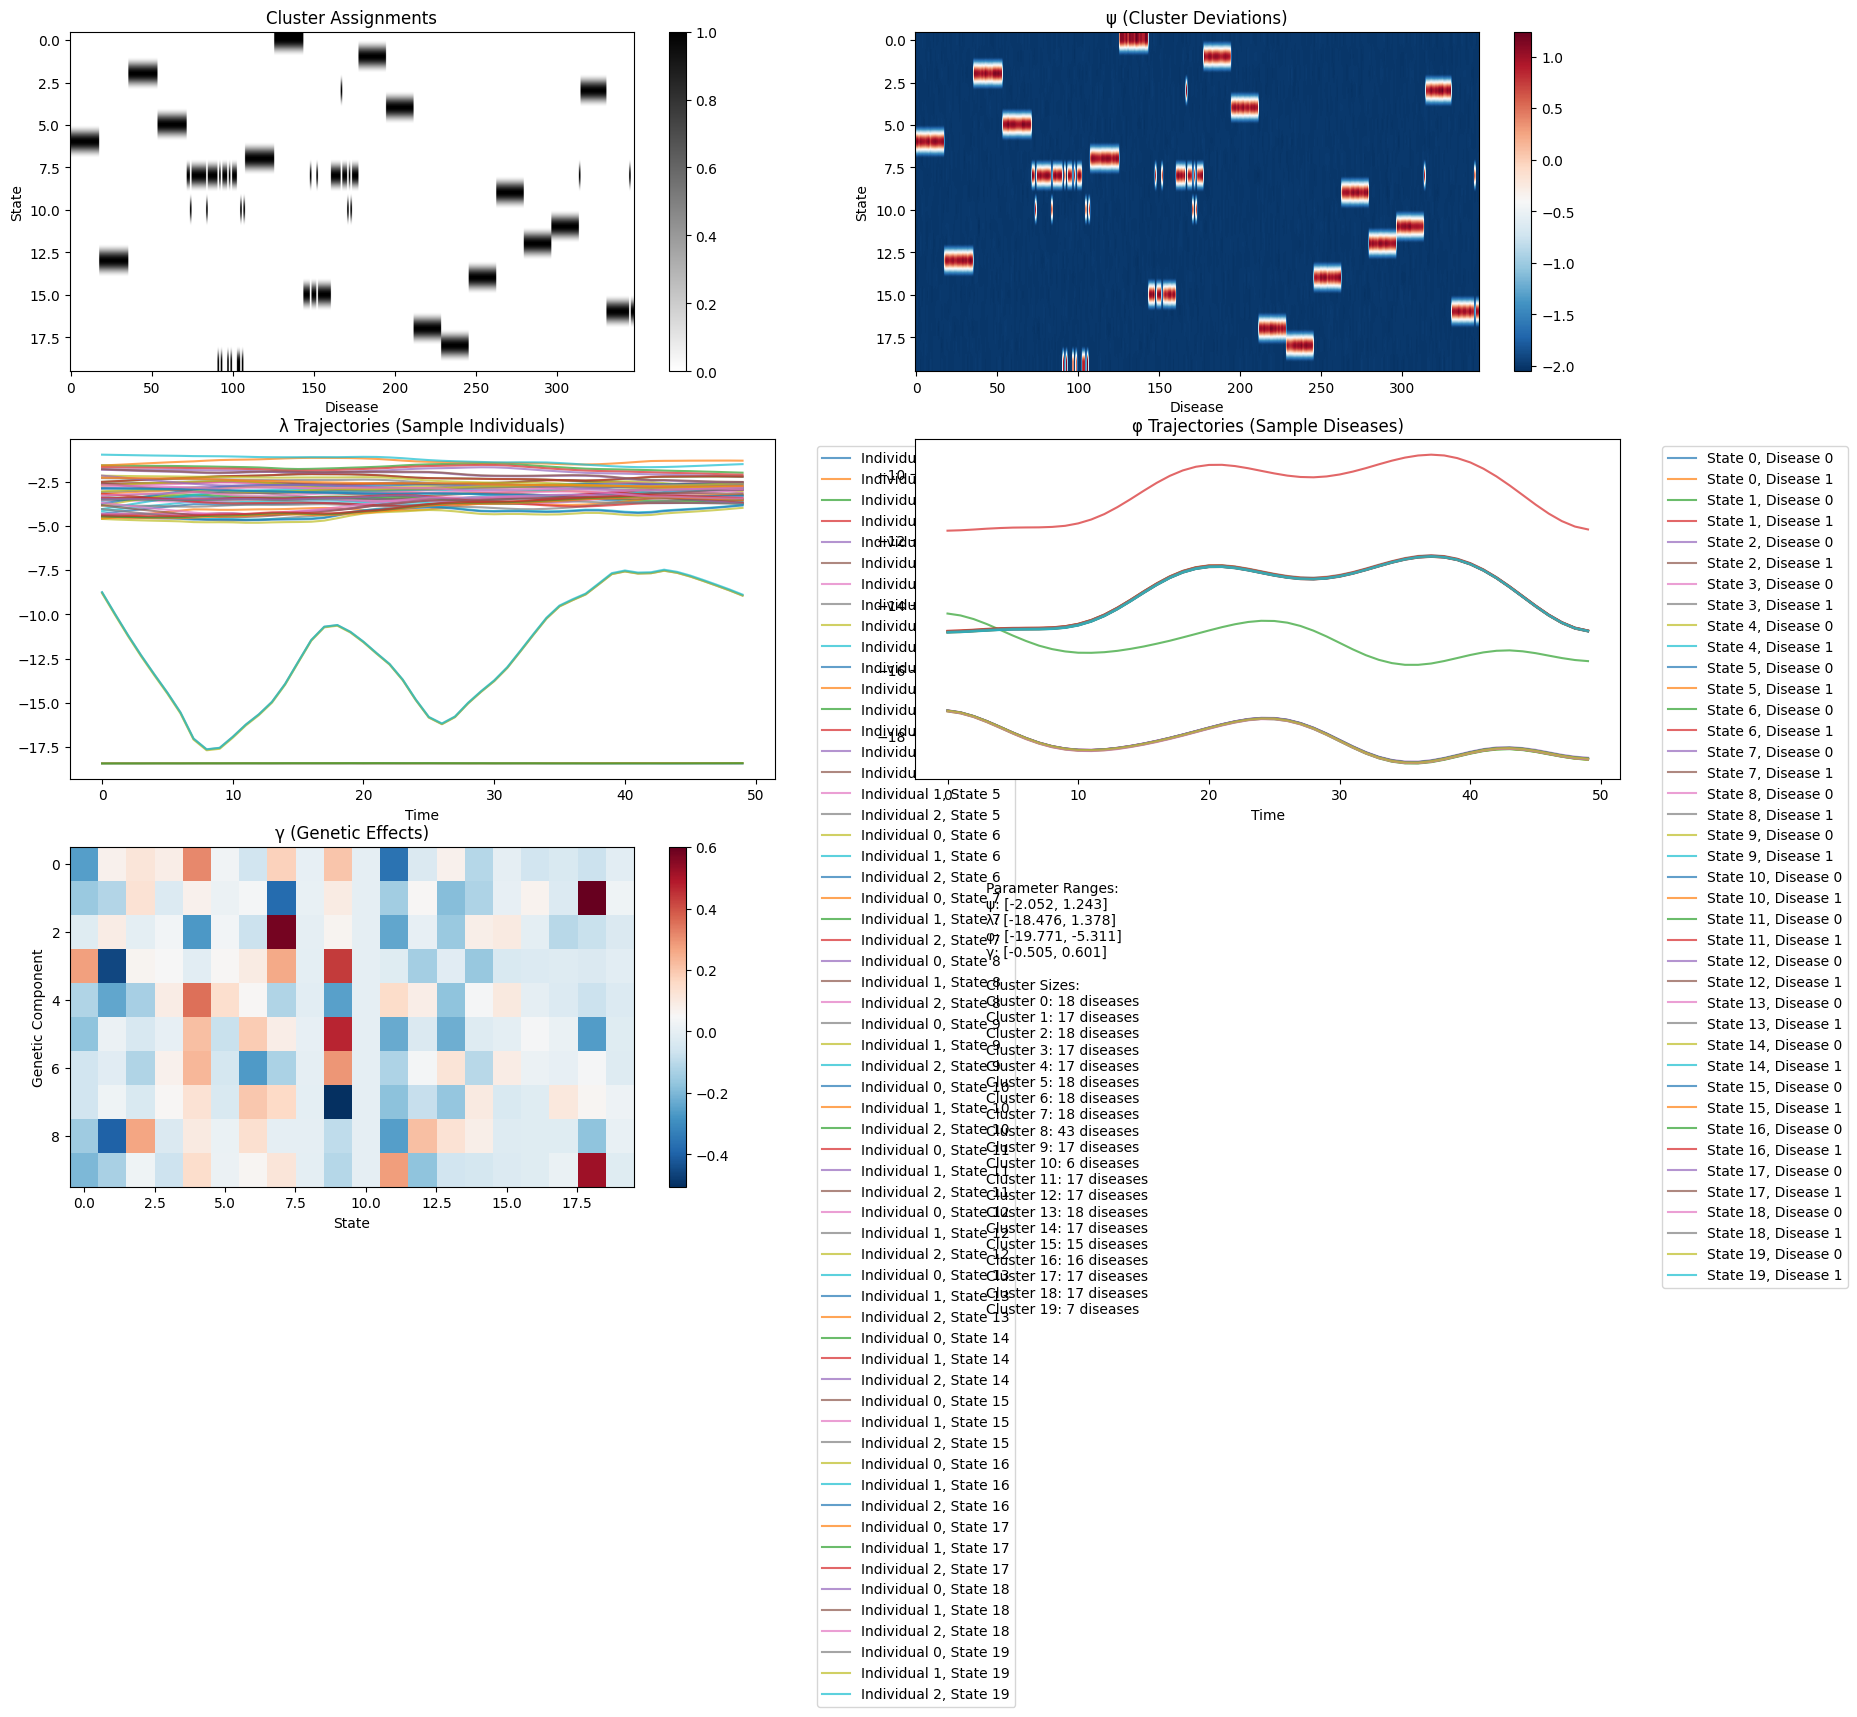

In [230]:
model_with_refs.visualize_initialization()

In [231]:
import cProfile
import pstats
from pstats import SortKey

# For the healthtoo version
profiler = cProfile.Profile()
profiler.enable()
history_new = model_with_refs.fit(sim_data['event_times'], num_epochs=200, learning_rate=1e-1, lambda_reg=1e-2)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats(SortKey.CUMULATIVE)
stats.print_stats(20)
        


Epoch 0
Loss: 108.0685

Monitoring signature responses:

Disease 136 (signature 0, LR=24.66):
  Theta for diagnosed: 0.159 ± 0.069
  Theta for others: 0.060
  Proportion difference: 0.100

Disease 279 (signature 9, LR=24.25):
  Theta for diagnosed: 0.409 ± 0.146
  Theta for others: 0.108
  Proportion difference: 0.301

Disease 34 (signature 13, LR=23.59):
  Theta for diagnosed: 0.134 ± 0.043
  Theta for others: 0.050
  Proportion difference: 0.084

Disease 305 (signature 11, LR=23.42):
  Theta for diagnosed: 0.258 ± 0.089
  Theta for others: 0.079
  Proportion difference: 0.178

Disease 142 (signature 0, LR=23.34):
  Theta for diagnosed: 0.166 ± 0.060
  Theta for others: 0.059
  Proportion difference: 0.106

Epoch 1
Loss: 59675.6016

Monitoring signature responses:

Disease 136 (signature 0, LR=24.66):
  Theta for diagnosed: 0.159 ± 0.068
  Theta for others: 0.060
  Proportion difference: 0.100

Disease 279 (signature 9, LR=24.29):
  Theta for diagnosed: 0.410 ± 0.145
  Theta for othe

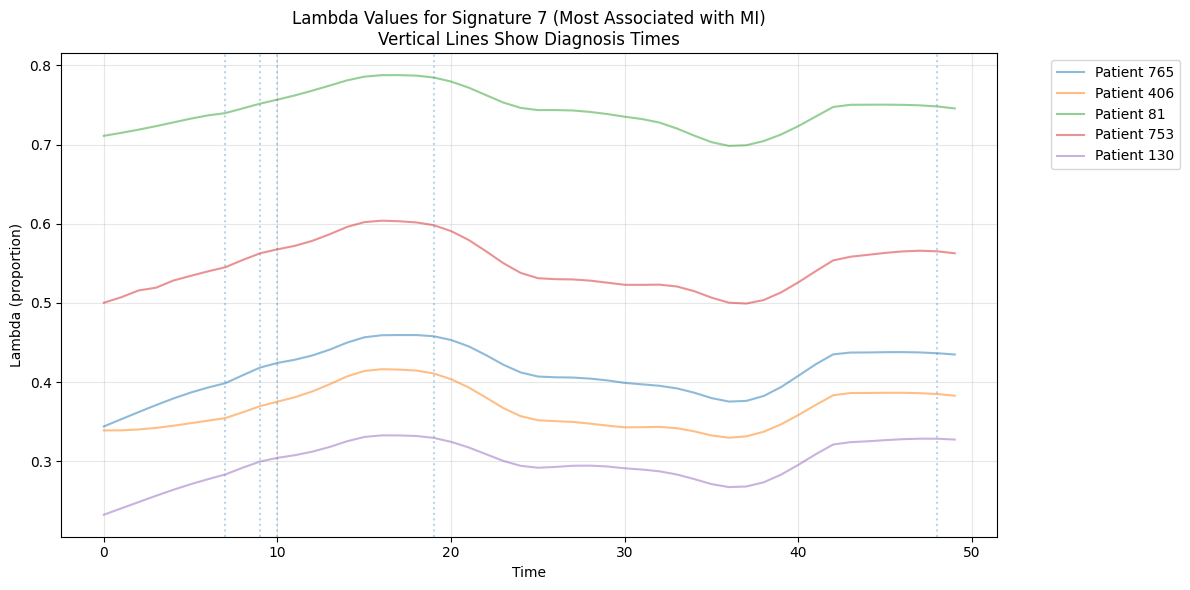

In [232]:
def plot_disease_lambda_alignment(model):
    """
    Plot lambda values aligned with disease occurrences for selected patients
    """
    # Find patients with specific diseases and their diagnosis times
    disease_idx = 112  # MI
    patients_with_disease = []
    diagnosis_times = []
    
    for patient in range(model.Y.shape[0]):
        diag_time = torch.where(model.Y[patient, disease_idx])[0]
        if len(diag_time) > 0:
            patients_with_disease.append(patient)
            diagnosis_times.append(diag_time[0].item())
    
    # Sample a few patients
    n_samples = min(5, len(patients_with_disease))
    sample_indices = np.random.choice(len(patients_with_disease), n_samples, replace=False)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 6))
    time_points = np.arange(model.T)
    
    # Find signature that most strongly associates with this disease
    psi_disease = model.psi[:, disease_idx].detach()
    sig_idx = torch.argmax(psi_disease).item()
    
    # Plot for each sampled patient
    for idx in sample_indices:
        patient = patients_with_disease[idx]
        diag_time = diagnosis_times[idx]
        
        # Plot lambda (detached)
        lambda_values = torch.softmax(model.lambda_[patient].detach(), dim=0)[sig_idx]
        ax.plot(time_points, lambda_values.numpy(),
                alpha=0.5, label=f'Patient {patient}')
        
        # Mark diagnosis time
        ax.axvline(x=diag_time, linestyle=':', alpha=0.3)
    
    ax.set_title(f'Lambda Values for Signature {sig_idx} (Most Associated with MI)\nVertical Lines Show Diagnosis Times')
    ax.set_xlabel('Time')
    ax.set_ylabel('Lambda (proportion)')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_disease_lambda_alignment(model_with_refs)

Number of diseases: 348, Number of timepoints: 50
Overall mean predicted risk: 0.000006
Overall mean observed risk: 0.000013
Overall calibration factor: 2.3234


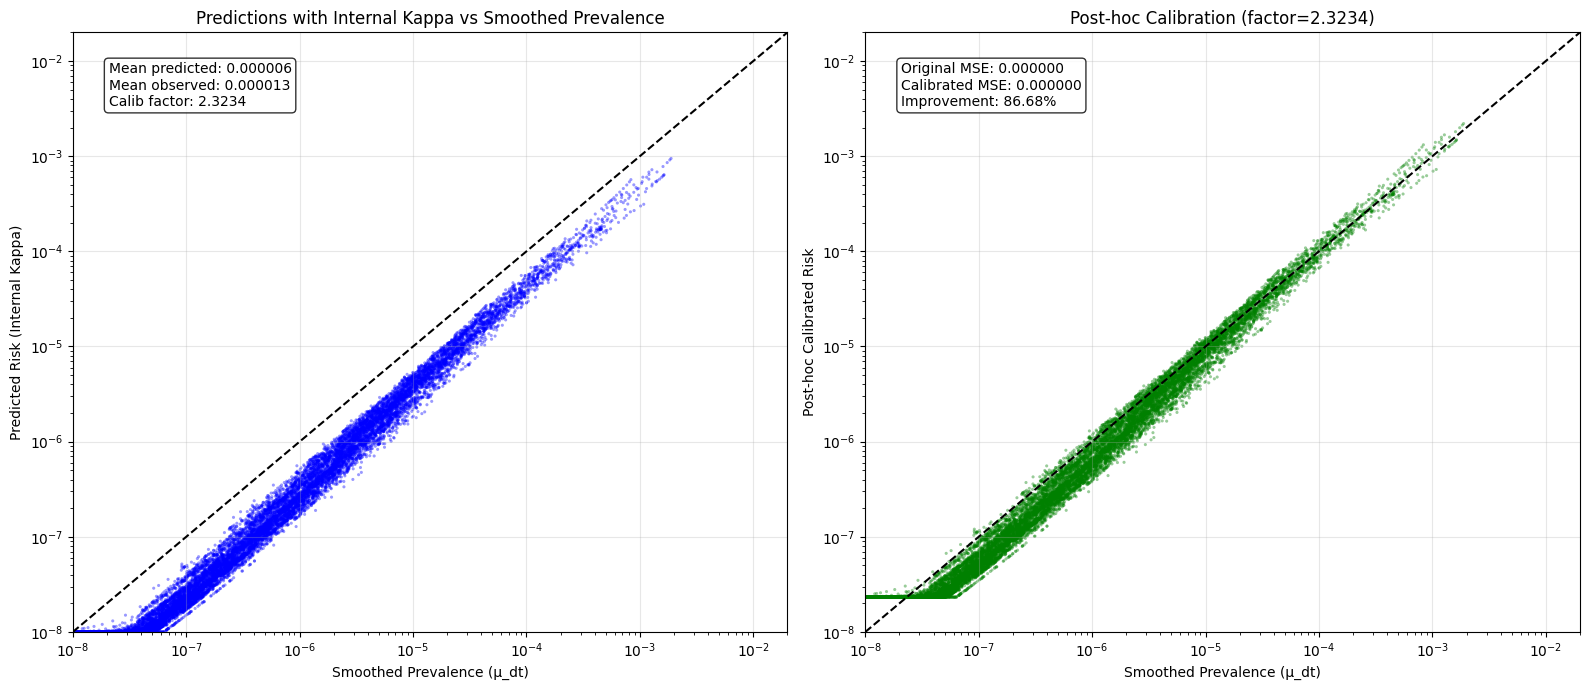


Calibration with Internal Kappa:
Mean predicted risk: 0.000006
Mean observed prevalence: 0.000013
Calibration factor needed: 2.3234
MSE before post-hoc calibration: 0.000000
MSE after post-hoc calibration: 0.000000
Improvement from post-hoc calibration: 86.68%


In [237]:
def analyze_internal_kappa_calibration(model, mu_dt):
    """
    Analyze calibration for a model with internal kappa implementation
    
    Args:
        model: The loaded model with internal kappa
        mu_dt: The observed prevalence matrix
    
    Returns:
        Calibration plot figure
    """
    # Get predictions from the model
    with torch.no_grad():
        pi, theta, phi_prob = model.forward()
    
    # Convert to numpy for analysis
    pi_np = pi.detach().numpy()
    
    # Aggregate predictions and observations
    all_pi_values = []
    all_mu_dt_values = []
    
    n_diseases, n_timepoints = mu_dt.shape
    print(f"Number of diseases: {n_diseases}, Number of timepoints: {n_timepoints}")
    
    # Aggregate pi values for each disease and timepoint
    for d in range(n_diseases):
        for t in range(n_timepoints):
            # Get valid entries (non-NaN) for this disease and timepoint
            valid_mask = ~np.isnan(pi_np[:, d, t])
            n_valid = np.sum(valid_mask)
            
            if n_valid > 0:
                avg_pi_dt = np.mean(pi_np[valid_mask, d, t])
                all_pi_values.append(avg_pi_dt)
                all_mu_dt_values.append(mu_dt[d, t])
    
    # Convert to numpy arrays
    all_pi_values = np.array(all_pi_values)
    all_mu_dt_values = np.array(all_mu_dt_values)
    
    # Calculate calibration factor
    valid_mask = (all_pi_values > 0) & (all_mu_dt_values > 0)
    pi_valid = all_pi_values[valid_mask]
    mu_dt_valid = all_mu_dt_values[valid_mask]
    
    mean_pred = np.mean(pi_valid)
    mean_obs = np.mean(mu_dt_valid)
    calib_factor = mean_obs / mean_pred
    
    print(f"Overall mean predicted risk: {mean_pred:.6f}")
    print(f"Overall mean observed risk: {mean_obs:.6f}")
    print(f"Overall calibration factor: {calib_factor:.4f}")
    
    # Create figure with two plots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Plot 1: Original predictions vs. smoothed prevalence
    ax1.scatter(mu_dt_valid, pi_valid, alpha=0.4, s=5, color='blue', edgecolor='none')
    ax1.plot([1e-8, 2e-2], [1e-8, 2e-2], 'k--', linewidth=1.5)  # Perfect calibration line
    
    ax1.set_xlabel('Smoothed Prevalence (μ_dt)')
    ax1.set_ylabel('Predicted Risk (Internal Kappa)')
    ax1.set_title('Predictions with Internal Kappa vs Smoothed Prevalence')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlim(1e-8, 2e-2)
    ax1.set_ylim(1e-8, 2e-2)
    ax1.grid(True, alpha=0.3)
    
    # Add text with calibration metrics
    ax1.text(0.05, 0.95, 
             f"Mean predicted: {mean_pred:.6f}\nMean observed: {mean_obs:.6f}\nCalib factor: {calib_factor:.4f}", 
             transform=ax1.transAxes, 
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Plot 2: Post-hoc calibrated predictions
    scaled_pi = pi_valid * calib_factor
    
    ax2.scatter(mu_dt_valid, scaled_pi, alpha=0.4, s=5, color='green', edgecolor='none')
    ax2.plot([1e-8, 2e-2], [1e-8, 2e-2], 'k--', linewidth=1.5)  # Perfect calibration line
    
    ax2.set_xlabel('Smoothed Prevalence (μ_dt)')
    ax2.set_ylabel('Post-hoc Calibrated Risk')
    ax2.set_title(f'Post-hoc Calibration (factor={calib_factor:.4f})')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xlim(1e-8, 2e-2)
    ax2.set_ylim(1e-8, 2e-2)
    ax2.grid(True, alpha=0.3)
    
    # Add text with calibration improvement metrics
    mse_orig = np.mean((pi_valid - mu_dt_valid)**2)
    mse_calib = np.mean((scaled_pi - mu_dt_valid)**2)
    improvement = (mse_orig - mse_calib) / mse_orig * 100
    
    ax2.text(0.05, 0.95, 
             f"Original MSE: {mse_orig:.6f}\nCalibrated MSE: {mse_calib:.6f}\nImprovement: {improvement:.2f}%", 
             transform=ax2.transAxes, 
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print(f"\nCalibration with Internal Kappa:")
    print(f"Mean predicted risk: {mean_pred:.6f}")
    print(f"Mean observed prevalence: {mean_obs:.6f}")
    print(f"Calibration factor needed: {calib_factor:.4f}")
    print(f"MSE before post-hoc calibration: {mse_orig:.6f}")
    print(f"MSE after post-hoc calibration: {mse_calib:.6f}")
    print(f"Improvement from post-hoc calibration: {improvement:.2f}%")
    
    return fig, all_pi_values, all_mu_dt_values, calib_factor

# Usage example:
# Assuming you have your model and mu_dt (prevalence matrix) available
mu_dt = model_with_refs.prevalence_t #  Shape: (348, 52)
fig, all_pi, all_mu_dt, calib_factor = analyze_internal_kappa_calibration(model_with_refs, mu_dt)

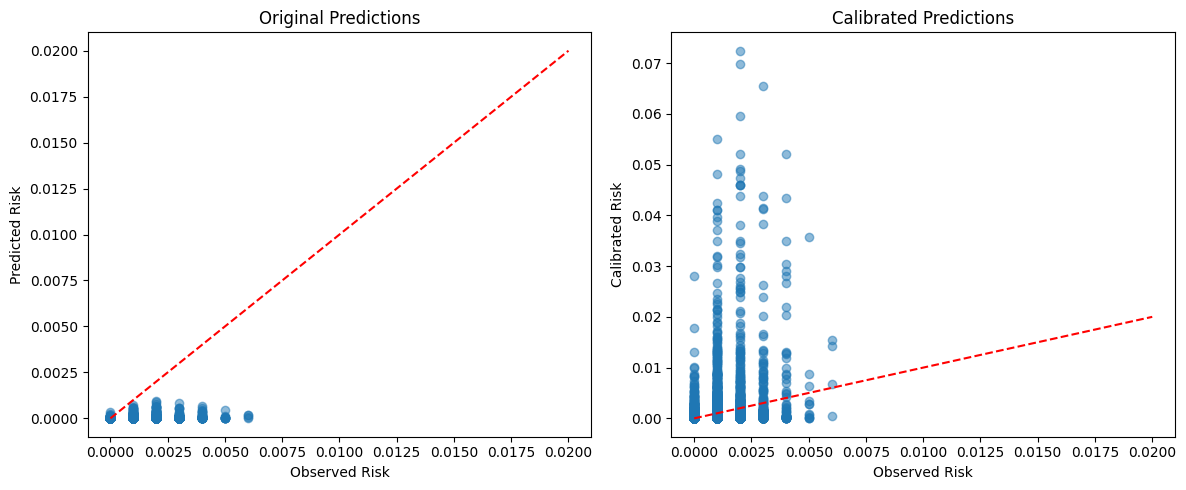

Mean observed risk: 0.000442
Mean predicted risk (original): 0.000006
Mean predicted risk (calibrated): 0.000442
Calibration scale factor: 76.523


In [238]:
# 1. Get predictions and actual values
model=model_with_refs
Y=sim_data['Y']
predicted = model.forward()
pi_pred = predicted[0] if isinstance(predicted, tuple) else predicted
pi_pred = pi_pred.cpu().detach().numpy()
Y = model.Y.cpu().detach().numpy()

# 2. Calculate marginal risks directly
# Assuming dimensions are: [N, D, T] for both Y and pi_pred
observed_risk = Y.mean(axis=0).flatten()  # average across individuals
predicted_risk = pi_pred.mean(axis=0).flatten()
#observed_risk=mu_dt_flat
# 3. Apply calibration
scale_factor = np.mean(observed_risk) / np.mean(predicted_risk)
calibrated_risk = predicted_risk * scale_factor

# 4. Plot
plt.figure(figsize=(12, 5))

# Original predictions
plt.subplot(121)
plt.scatter(observed_risk, predicted_risk, alpha=0.5)
plt.plot([0, 0.02], [0, 0.02], 'r--')  # y=x line
plt.title('Original Predictions')
plt.xlabel('Observed Risk')
plt.ylabel('Predicted Risk')

# Calibrated predictions
plt.subplot(122)
plt.scatter(observed_risk, calibrated_risk, alpha=0.5)
#plt.plot([0, 0.02], [0, 0.02], 'r--')  # y=x line
plt.title('Calibrated Predictions')
plt.xlabel('Observed Risk')
plt.ylabel('Calibrated Risk')

plt.tight_layout()
plt.show()

# Print statistics
print(f"Mean observed risk: {np.mean(observed_risk):.6f}")
print(f"Mean predicted risk (original): {np.mean(predicted_risk):.6f}")
print(f"Mean predicted risk (calibrated): {np.mean(calibrated_risk):.6f}")
print(f"Calibration scale factor: {scale_factor:.3f}")


In [239]:
model_with_refs.kappa

tensor([1.])

In [240]:
def plot_training_evolution(history_tuple):
    losses, gradient_history = history_tuple
    
    plt.figure(figsize=(15, 5))
    
    # Plot loss
    plt.subplot(1, 3, 1)
    plt.plot(losses, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Evolution')
    plt.yscale('log')
    plt.legend()
    
    # Plot lambda gradients
    plt.subplot(1, 3, 2)
    lambda_norms = [torch.norm(g).item() for g in gradient_history['lambda_grad']]
    plt.plot(lambda_norms, label='Lambda gradients')
    plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel('Gradient norm')
    plt.title('Lambda Gradient Evolution')
    plt.legend()
    
    # Plot phi gradients
    plt.subplot(1, 3, 3)
    phi_norms = [torch.norm(g).item() for g in gradient_history['phi_grad']]
    plt.plot(phi_norms, label='Phi gradients')
    plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel('Gradient norm')
    plt.title('Phi Gradient Evolution')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

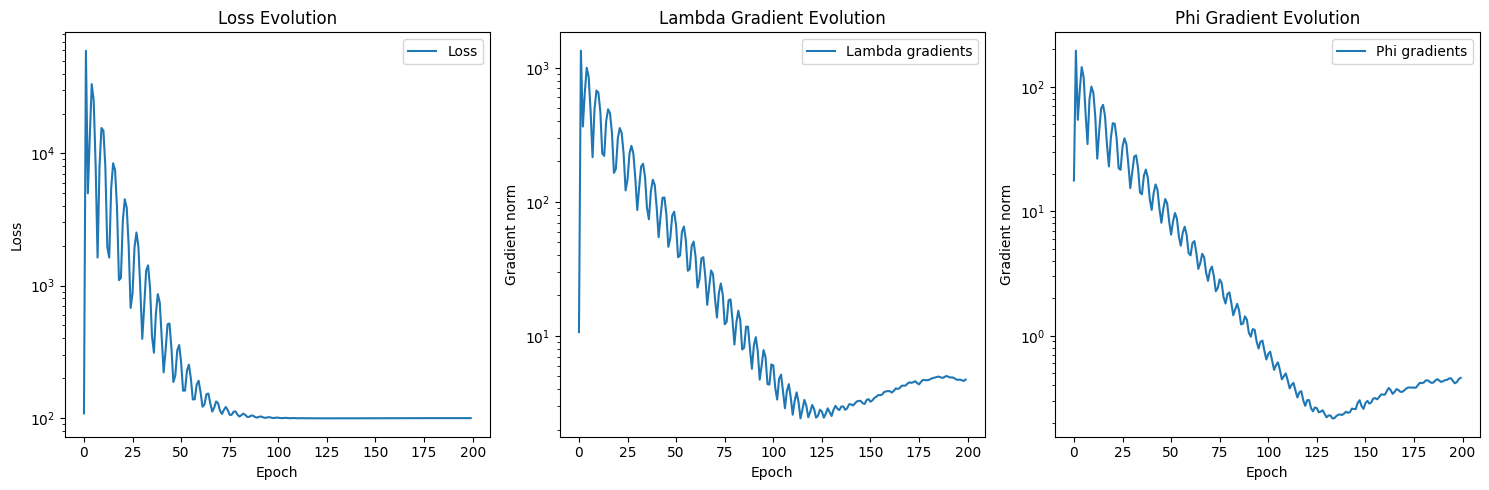

In [241]:
plot_training_evolution(history_new)

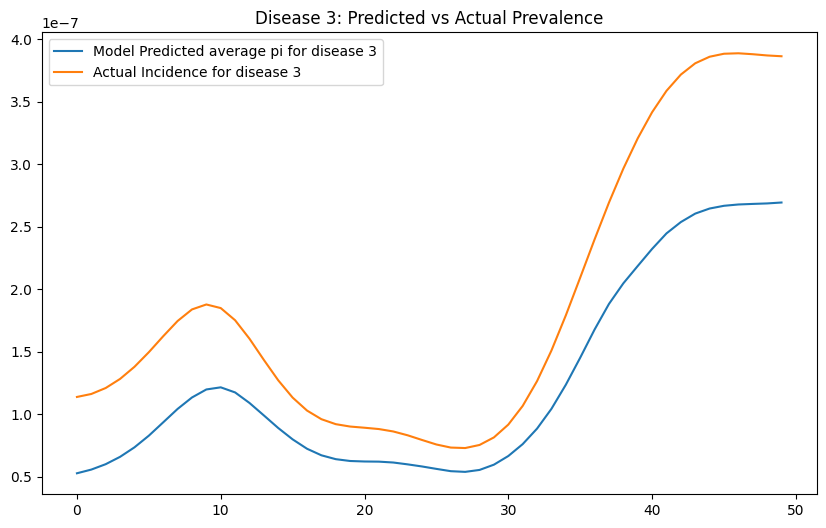

In [245]:
# Mean predicted probability for disease 3 over time
with torch.no_grad():
    pi_pred, theta, phi = model_with_refs.forward()
    pi_pred = pi_pred.cpu().numpy()
    pi_pred = pi_pred * 2.3234

mean_pred_d3 = pi_pred[:, 3, :].mean(axis=0)  # Average across people

# Actual prevalence for disease 3 over time
#real_prev_pi = sim_data['pi'][:, 3, :].mean(axis=0)  # Average across people

#real_prev_d3 = data['Y'][:, 3, :].mean(axis=0)  # Average across people

real_prev_d3 = model_with_refs.prevalence_t[3,:]  # Average across people

# Plot comparison
plt.figure(figsize=(10,6))
plt.plot(mean_pred_d3, label='Model Predicted average pi for disease 3')
#plt.plot(real_prev_pi, label='Actual Average Pi for disease 3 ')
plt.plot(real_prev_d3, label='Actual Incidence for disease 3')
plt.title('Disease 3: Predicted vs Actual Prevalence')
plt.legend()
plt.show()



Clustering Metrics:
Adjusted Rand Index: 0.843
Normalized Mutual Information: 0.943


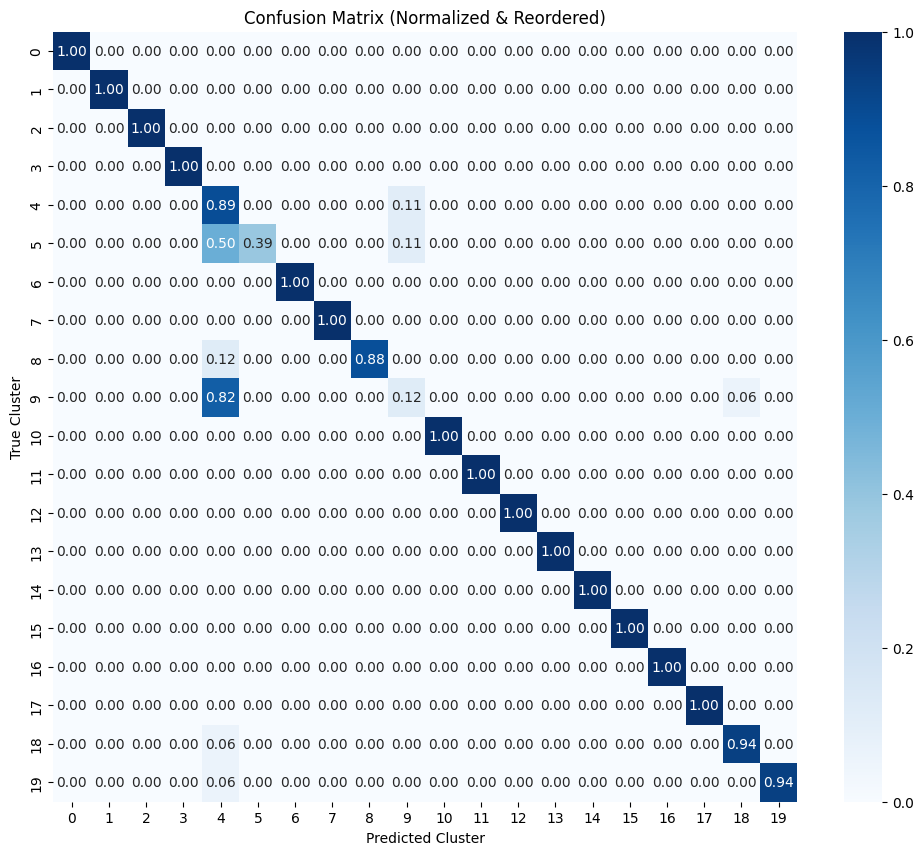

array([ 6, 13,  2,  5,  8, 19,  7,  0, 15, 10,  1,  4, 17, 18, 14,  9, 12,
       11,  3, 16])

In [205]:
from analyze_clusters import *
plot_confusion_matrix(sim_data['clusters'],model_with_refs.clusters, K=20) 

In [207]:
from new_clust import *
print_model_params(model_with_refs)


Model Parameter Diagnostics:
------------------------------

Lambda shape: torch.Size([1000, 20, 50])
Lambda range: [-18.567, 1.372]
Lambda mean: -4.276
Lambda std: 3.931

Psi shape: torch.Size([20, 348])
Psi range: [-2.065, 1.641]
Psi mean: -1.849
Psi std: 0.657

Pi shape: torch.Size([1000, 348, 50])
Pi range: [0.000, 0.034]
Pi mean: 0.000
Pi std: 0.000

Model attributes:
D: <class 'int'>
G: Tensor of shape torch.Size([1000, 10])
K: <class 'int'>
K_lambda: Tensor of shape torch.Size([50, 50])
K_lambda_init: Tensor of shape torch.Size([50, 50])
K_phi: Tensor of shape torch.Size([50, 50])
K_phi_init: Tensor of shape torch.Size([50, 50])
K_total: <class 'int'>
N: <class 'int'>
P: <class 'int'>
T: <class 'int'>
T_destination: <class 'typing.TypeVar'>
Y: Tensor of shape torch.Size([1000, 348, 50])
base_K_lambda: Tensor of shape torch.Size([50, 50])
base_K_phi: Tensor of shape torch.Size([50, 50])
call_super_init: <class 'bool'>
clusters: <class 'numpy.ndarray'>
disease_names: <class 'None